# Final Project
By: Urjeet Deshmukh, Hosea Wah, and Peiyi Wu

----

### Introduction
We have decided to analyze each neighborhood based on several factors to conclude which neighborhood is indeed the "best." 

#### Police Firearm Seizures - Urjeet Deshmukh
Metric Explanation: I decided to use the metric of the number of firearms that were confiscated by police in each respective neighborhood. Seizures are associated with illegal ownership, the suspected usage of a firearm in a crime, or simply public safety maintenance. This is a proper metric to guage the "best" neighborhood becuase it justifies many qualities such as connection to crime and the active threat that could be possible.

In [21]:
import pandas as pd
import numpy as np

In [34]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

##### Sample Data

In [35]:
# Import data and show a sample of 10 rows observing neighborhood
df = pd.read_csv("https://data.wprdc.org/datastore/dump/e967381d-d7e9-48e3-a2a2-39262f7fa5c4")
simplified_data = df[['neighborhood', 'total_count']]
simplified_data.sample(5)

,neighborhood,total_count
2164,East Hills,2
2144,Shadyside,1
1232,North Shore,5
992,Homewood South,1
2563,South Oakland,1


##### Total Firearms and Total Neighborhoods

In [36]:
# Compute total amount of firearms confiscated in every neighborhood
total_firearms = simplified_data['total_count'].sum()
print('The total amount of firearms confiscated in every neighborhood is', total_firearms)

The total amount of firearms confiscated in every neighborhood is 3757


In [37]:
total_neighborhoods = len(simplified_data['neighborhood'].unique())
print('There are a total of', total_neighborhoods, 'different neighborhoods')

There are a total of 88 different neighborhoods


##### Descending and Ascending Data Regarding Amount of Firearms Seized

In [38]:
final_data_descending = simplified_data['neighborhood'].value_counts()
final_data_descending.head(10)

Homewood South               158
South Side Flats             110
Larimer                       88
Homewood North                86
Hazelwood                     80
Marshall-Shadeland            75
Carrick                       75
Perry South                   73
Sheraden                      72
Central Business District     71
Name: neighborhood, dtype: int64

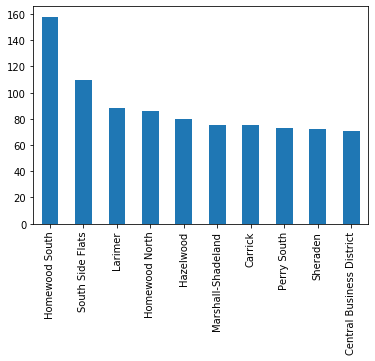

In [39]:
import matplotlib.pyplot as plt
final_data_descending.head(10).plot.bar()

In [40]:
final_data_ascending = simplified_data['neighborhood'].value_counts().sort_values(ascending = True)
final_data_ascending.head(10)

Lincoln Place     1
Oakwood           2
Esplen            2
West End          2
Mt. Oliver        2
Summer Hill       2
Regent Square     3
Chartiers City    3
Friendship        3
Hays              3
Name: neighborhood, dtype: int64

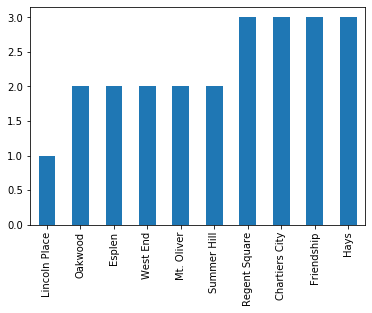

In [41]:
import matplotlib.pyplot as plt
final_data_ascending.head(10).plot.bar()

#### Urjeet Deshmukh's Metric Final Analysis
Metric 1: I measured the amount of firearms seized per neighborhood. It is important to remember this is the data of firearms seized due to wrongful holdings rather than legal possession of a firearm. I narrowed my data set to only show the certain neighborhoods and total amount of firearms seized. I split my data to show the top 10 and bottom 10 following ascending and descending methods. According to the data analyzed, Lincoln Place is the safest neighborhood as only 1 firearm was seized. Next follow the neighborhoods of Esplen, Mt. Oliver, Oakwood, Summer Hill, and West End all with 2 firearms seized in each respective neighborhood. Only according to my metric, disregarding other metrics, I deduce that Lincoln Place is the "best" neighborhood in terms of firearms seized.

----

#### Air Quality---Peiyi Wu

I choose air quality as the material to determine the best neighborhood, because air quality determines the health of the respiratory system and affects the mood of the neighbors. My metic is the Hourly Air Quality Data in Allegheny County, the data covered include co, h2s, ozone, pm2.5 and pm1.0, so2 and many chemical element that floating in the air is harmful to the body . In this metric, I take so2 and pm2.5 as measurement criteria. Sulfur dioxide (SO2) is a colorless, reactive gas produced when sulfur-containing fuels such as coal and oil are burned. Even short-term exposure to SO2 can irritate airways and make breathing difficult, especially for sensitive groups. SO2 also contributes to smog and acid rain, which can damage plants and trees.Fine particulate matter (PM2.5) consists of a mixture of solids and liquid droplets so small they are only visible with an electron microscope. These particles can be inhaled and may contain hundreds of different chemicals - some are released into the air directly, while others form when they react with other pollutants in the atmosphere.
The higher the number, the worse the air. So the lowest number proves the best neighbor. Cities with incomplete data were not included in the study.


#### The main data set





In [6]:
import pandas as pd
import numpy as np

import ssl

ssl._create_default_https_context = ssl._create_unverified_context

pgh_AirQuality_data = pd.read_csv("https://data.wprdc.org/datastore/dump/15d7dbf6-cb3b-407b-ae01-325352deed5c",
                               index_col="site",
                               parse_dates=True)
pgh_AirQuality_data.head()

,datetime,bcstat,bcstat_txt,bp,bp_txt,co,co_txt,h2s,h2s_txt,int_t,...,sonicws,sonicws_txt,uvpm,uvpm_txt,rainfall,rainfall_txt,solarrad,solarrad_txt,uv_rad,uv_rad_txt
site,,,,,,,,,,,,,,,,,,,,,
Avalon,2016-01-30T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,23.1,...,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avalon,2016-01-15T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,C,25.7,...,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avalon,2016-01-15T01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,C,25.8,...,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avalon,2016-01-15T02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,25.6,...,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avalon,2016-01-15T03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,25.6,...,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### THe describe for the Data that focus on SO2 and PM2.5
Some Numbers are negative because the instrument uses standard gases for comparison.
From this data set, we can observe that the influence of so2 is not obvious in different neighborhood, while pm2.5 has a large range：is considered moderate when the value exceeds 50； Anything from 100 to 150 is unhealthy for sensitive group；and anything above 150 is unhealthy.


In [23]:
ssl._create_default_https_context = ssl._create_unverified_context
df = pd.read_csv("https://data.wprdc.org/datastore/dump/15d7dbf6-cb3b-407b-ae01-325352deed5c")
simplified_data = df[['site', 'so2','pm25']]
simplified_data.describe()

,so2,pm25
count,197278.000000,63490.000000
mean,0.001351,11.782155
std,0.004397,12.295519
min,-0.001000,-4.000000
25%,0.000000,5.000000
50%,0.000000,8.000000
75%,0.001000,14.000000
max,0.171000,197.000000


In [8]:
# Compare the average for each city
pgh_AirQuality_data.groupby(['site'])['so2','pm25'].mean()

,so2,pm25
site,,
Avalon,0.000177,NaN
Clairton,0.001251,NaN
Flag Plaza,NaN,NaN
Glassport High Street,NaN,NaN
Harrison Township,NaN,NaN
Lawrenceville,NaN,NaN
Lawrenceville 2,0.000604,NaN
Liberty,0.003935,NaN
Liberty 2,NaN,10.229342


#### The bar graph for the average of so2

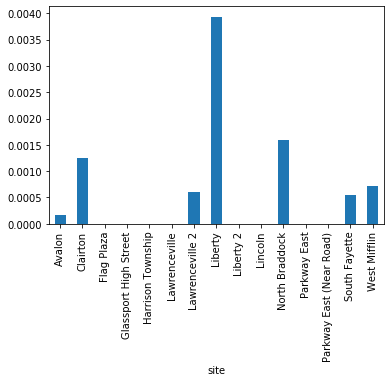

In [9]:
# THe bar graph of 
mn1=pgh_AirQuality_data.groupby(['site'])['so2'].mean()
mn1.plot .bar();

#### The bar graph for the average of PM 2.5

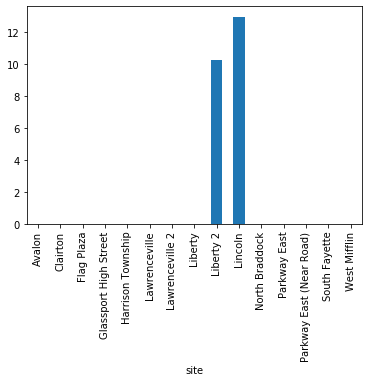

In [10]:
mn2=pgh_AirQuality_data.groupby(['site'])['pm25'].mean()
mn2.plot.bar();

# Urjeet，i dont think lincln can be the best neberhood any more but youcan say if only consider so2 lincoln is still the best. 

In [2]:
import pandas as pd 
import numpy as np


In [3]:
pgh_311_data = pd.read_csv("https://data.wprdc.org/datastore/dump/5d61b60b-bd25-4c33-8420-e31a9135ec6e")
                           
pgh_311_data.head()


,Neighborhood,Sector #,Population (2010),Miles of Major Roads,Total Street Miles,Street Density (st. mi/area sq. mi),# Sets of Steps,# Step Treads,Res. Permit Parking Area(s),Total Working Pop. (Age 16+) (2010),Commute to Work: Drive Alone (2010),Commute to Work: Carpool/Vanpool (2010),Commute to Work: Public Transportation (2010),Commute to Work: Taxi (2010),Commute to Work: Motorcycle (2010),Commute to Work: Bicycle (2010),Commute to Work: Walk (2010),Commute to Work: Other (2010),Work at Home (2010)
0,Allegheny Center,3,933,2.23,4.14,19.7,0,0,None,386,27.7%,9.8%,16.8%,0.0%,0.0%,0.0%,43.8%,0.0%,1.8%
1,Allegheny West,3,462,1.47,4.87,34.5,0,0,G,151,23.2%,20.5%,15.9%,14.6%,0.0%,0.0%,25.8%,0.0%,0.0%
2,Allentown,6,"2,500",1.65,12.33,41.8,12,474,None,824,47.0%,10.9%,38.0%,0.0%,0.8%,0.0%,0.0%,1.5%,1.8%
3,Arlington,7,"1,869",0.86,10.73,22.8,13,428,None,673,74.0%,7.3%,13.5%,0.0%,0.0%,0.0%,1.9%,0.9%,2.4%
4,Arlington Heights,7,244,0.00,1.09,8.2,0,0,None,72,11.1%,0.0%,88.9%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%


In [ ]:
# Original DATA Pulled from WPRDC

In [4]:
df = pd.read_csv("https://data.wprdc.org/datastore/dump/5d61b60b-bd25-4c33-8420-e31a9135ec6e")
easy_data = df [['Commute to Work: Carpool/Vanpool (2010)', 'Neighborhood']]
easy_data.sample(10)


,Commute to Work: Carpool/Vanpool (2010),Neighborhood
57,0.0%,Northview Heights
37,18.1%,Hays
31,14.7%,Fairywood
75,4.5%,Squirrel Hill North
69,2.8%,South Oakland
71,8.0%,South Side Flats
50,6.8%,Middle Hill
76,8.7%,Squirrel Hill South
18,8.1%,Central Northside
68,20.8%,Sheraden


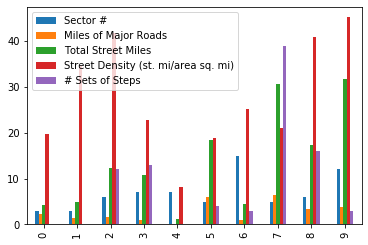

In [5]:
import matplotlib.pyplot as plt

pgh_311_data = pd.read_csv("https://data.wprdc.org/datastore/dump/5d61b60b-bd25-4c33-8420-e31a9135ec6e")

pgh_311_data.head(10).plot.bar()